# Homework 3

##### by Cemre Çelebi

In [3]:
library(dplyr)
library("MLmetrics")
library("data.table")
library("readr")
library(tidyverse)
require(glmnet)
require(lubridate)
require(tidyr)
library("glmnet")
library("Rmpfr")
library("CVXR")


In [4]:

data <- read.csv("/Users/cemrecelebi/Desktop/courses20-21fall/IE 582/HW3/RealTimeConsumption-01012016-01122020.csv",stringsAsFactors = FALSE)


In [5]:
# to understand data
#head(data)
summary(is.na(data))
dim(data)  #no missing value
#head(data)
#str(data)
data$Consumption..MWh. =  gsub(",", "",data$Consumption..MWh., fixed = TRUE)
data$Consumption..MWh. <- as.numeric(data$Consumption..MWh.)
#head(data)

    Date            Hour         Consumption..MWh.
 Mode :logical   Mode :logical   Mode :logical    
 FALSE:43128     FALSE:43128     FALSE:43128      

[1] 43128     3

# Task A

In [6]:

error168<-c()
error48<-c()

a<-43128-31*24+1
b<-24*7
c<-24*2
#a
#b
#c

for (i in a:43128){
    
error168[i]<-(abs((data[i,3]-data[i-b,3])/data[i,3])) * 100
    
error48[i]<-(abs((data[i,3]-data[i-c,3])/data[i,3])) * 100
   
  }
error168 <- error168[a:43128]
error48 <- error48[a:43128]
mape168 <- mean(error168)
mape48 <- mean(error48)

cat("mape168 :", mape168,"\n")
cat("mape48 :", mape48)


mape168 : 3.449188 
mape48 : 8.060315

7-day-lag values provides lower MAPE value which also expected because of the weekends. When we are using 2-day lag values, we may use friday's value to predict sunday's consumption. 

Following part is build to take hourly mape values which is used in later, part f.

In [7]:
error_task_a<-cbind(data[a:nrow(data),1:2],data.frame(error168),data.frame(error48))


In [8]:
error_task_a$Hour<-as.factor(error_task_a$Hour)
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="0:00"] <- "0"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="1:00"] <- "1"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="2:00"] <- "2"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="3:00"] <- "3"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="4:00"] <- "4"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="5:00"] <- "5"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="6:00"] <- "6"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="7:00"] <- "7"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="8:00"] <- "8"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="9:00"] <- "9"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="10:00"] <- "10"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="11:00"] <- "11"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="12:00"] <- "12"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="13:00"] <- "13"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="14:00"] <- "14"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="15:00"] <- "15"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="16:00"] <- "16"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="17:00"] <- "17"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="18:00"] <- "18"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="19:00"] <- "19"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="20:00"] <- "20"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="21:00"] <- "21"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="22:00"] <- "22"
levels(error_task_a$Hour)[levels(error_task_a$Hour)=="23:00"] <- "23"

head(error_task_a)
str(error_task_a)

,Date,Hour,error168,error48
,<chr>,<fct>,<dbl>,<dbl>
42385,01.11.2020,0,2.716606,1.271322
42386,01.11.2020,1,2.745013,2.145508
42387,01.11.2020,2,3.975755,3.303632
42388,01.11.2020,3,3.794342,3.188004
42389,01.11.2020,4,2.965802,3.056191
42390,01.11.2020,5,4.056705,4.545323


'data.frame':	744 obs. of  4 variables:
 $ Date    : chr  "01.11.2020" "01.11.2020" "01.11.2020" "01.11.2020" ...
 $ Hour    : Factor w/ 24 levels "0","10","11",..: 1 12 17 18 19 20 21 22 23 24 ...
 $ error168: num  2.72 2.75 3.98 3.79 2.97 ...
 $ error48 : num  1.27 2.15 3.3 3.19 3.06 ...


Summary statistics are given below.

In [9]:
mape168_task_a_hourly<-c()
mape48_task_a_hourly<-c()

for(i in 0:23){
    
     what<-error_task_a %>% filter(Hour == i)
    mape168_task_a_hourly[i+1]=mean(what$error168)
     mape48_task_a_hourly[i+1]=mean(what$error48)
    
}
mape48_task_a_hourly <- data.frame(mape48_task_a_hourly)
mape168_task_a_hourly <- data.frame(mape168_task_a_hourly)

summary(mape48_task_a_hourly)
summary(mape168_task_a_hourly)

 mape48_task_a_hourly
 Min.   : 4.673      
 1st Qu.: 4.920      
 Median : 5.861      
 Mean   : 8.060      
 3rd Qu.:11.721      
 Max.   :14.147      

 mape168_task_a_hourly
 Min.   :2.466        
 1st Qu.:2.619        
 Median :2.830        
 Mean   :3.449        
 3rd Qu.:4.164        
 Max.   :5.441        

# Task B

In [10]:

str(data)


double = duplicated(data)
for (i in 1:length(double)){
    if (double[i] == 'TRUE'){
    print(data[i,])
        }
}
Q <- which(data$Consumption..MWh.==0)
data[2067,]
#2067
#x[duplicated(x)]
#Hour <- 0:23
#Hour
#long <- cbind(Hour,lag48[,3],lag168[,3],realconsumption[,3])
#long


'data.frame':	43128 obs. of  3 variables:
 $ Date             : chr  "01.01.2016" "01.01.2016" "01.01.2016" "01.01.2016" ...
 $ Hour             : chr  "0:00" "1:00" "2:00" "3:00" ...
 $ Consumption..MWh.: num  26277 24992 23533 22465 22003 ...
           Date Hour Consumption..MWh.
2069 27.03.2016 4:00          24776.94


,Date,Hour,Consumption..MWh.
,<chr>,<chr>,<dbl>
2067,27.03.2016,2:00,0


In [13]:
#head(data)

high = data$Date[Q]
low = data$Date[Q-(24*6)]

data$Date <- as.Date(data$Date,"%d.%m.%Y")


In [14]:
inuse<-data %>% filter(data$Date > high | data$Date < low)

In [15]:
#inuse

#inuse <- data %>% filter(data$Date > high)
#inuse
Lag48<-c()
Lag168<-c()

lag168 <- lag(inuse$Consumption..MWh., 168, na.pad = TRUE)
lag48 <- lag(inuse$Consumption..MWh., 48, na.pad = TRUE)

lag168<-data.table(lag168)
lag48<-data.table(lag48)
dim(lag48)
dim(lag168)
dim(inuse)
#lagmatrix <- function(x,max.lag) embed(c(rep(NA,max.lag), x), max.lag+1)
long<-cbind(inuse,lag48, lag168)
#lag168
#head(lag48)
#head(lag168)
long


[1] 42960     1

[1] 42960     1

[1] 42960     3

Date,Hour,Consumption..MWh.,lag48,lag168
<date>,<chr>,<dbl>,<dbl>,<dbl>
2016-01-01,0:00,26277.24,NA,NA
2016-01-01,1:00,24991.82,NA,NA
2016-01-01,2:00,23532.61,NA,NA
2016-01-01,3:00,22464.78,NA,NA
2016-01-01,4:00,22002.91,NA,NA
2016-01-01,5:00,21957.08,NA,NA
2016-01-01,6:00,22203.54,NA,NA
2016-01-01,7:00,21844.16,NA,NA
2016-01-01,8:00,23094.73,NA,NA


NA values originates from lags which are omitted below

In [16]:
long<-na.omit(long)
colnames(long)[4] = "Lag_48"
colnames(long)[5] = "Lag_168"
colnames(long)[3] = "Consumption"

long$Hour<-as.factor(long$Hour)

levels(long$Hour)[levels(long$Hour)=="0:00"] <- "0"
levels(long$Hour)[levels(long$Hour)=="1:00"] <- "1"
levels(long$Hour)[levels(long$Hour)=="2:00"] <- "2"
levels(long$Hour)[levels(long$Hour)=="3:00"] <- "3"
levels(long$Hour)[levels(long$Hour)=="4:00"] <- "4"
levels(long$Hour)[levels(long$Hour)=="5:00"] <- "5"
levels(long$Hour)[levels(long$Hour)=="6:00"] <- "6"
levels(long$Hour)[levels(long$Hour)=="7:00"] <- "7"
levels(long$Hour)[levels(long$Hour)=="8:00"] <- "8"
levels(long$Hour)[levels(long$Hour)=="9:00"] <- "9"
levels(long$Hour)[levels(long$Hour)=="10:00"] <- "10"
levels(long$Hour)[levels(long$Hour)=="11:00"] <- "11"
levels(long$Hour)[levels(long$Hour)=="12:00"] <- "12"
levels(long$Hour)[levels(long$Hour)=="13:00"] <- "13"
levels(long$Hour)[levels(long$Hour)=="14:00"] <- "14"
levels(long$Hour)[levels(long$Hour)=="15:00"] <- "15"
levels(long$Hour)[levels(long$Hour)=="16:00"] <- "16"
levels(long$Hour)[levels(long$Hour)=="17:00"] <- "17"
levels(long$Hour)[levels(long$Hour)=="18:00"] <- "18"
levels(long$Hour)[levels(long$Hour)=="19:00"] <- "19"
levels(long$Hour)[levels(long$Hour)=="20:00"] <- "20"
levels(long$Hour)[levels(long$Hour)=="21:00"] <- "21"
levels(long$Hour)[levels(long$Hour)=="22:00"] <- "22"
levels(long$Hour)[levels(long$Hour)=="23:00"] <- "23"

#long
long<-data.table(long)
#date
#lag48


In [17]:
train<- long[Date<"2020-11-01",]
test <-long[Date>="2020-11-01",]
summary(is.na(train))
#train<-na.omit(train)

    Date            Hour         Consumption       Lag_48       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:42048     FALSE:42048     FALSE:42048     FALSE:42048    
  Lag_168       
 Mode :logical  
 FALSE:42048    

In [18]:

linreg<-lm(Consumption~Lag_48+Lag_168,train)
linreg


Call:
lm(formula = Consumption ~ Lag_48 + Lag_168, data = train)

Coefficients:
(Intercept)       Lag_48      Lag_168  
  1570.1888       0.3086       0.6434  


In [19]:
summary(linreg)


Call:
lm(formula = Consumption ~ Lag_48 + Lag_168, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-17125.2   -986.0     -0.2   1019.6  16101.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.570e+03  8.372e+01   18.76   <2e-16 ***
Lag_48      3.086e-01  3.101e-03   99.52   <2e-16 ***
Lag_168     6.434e-01  3.098e-03  207.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2391 on 42045 degrees of freedom
Multiple R-squared:  0.7753,	Adjusted R-squared:  0.7753 
F-statistic: 7.255e+04 on 2 and 42045 DF,  p-value: < 2.2e-16


It is observed that both Lag48 and Lag 168 are valuable for linear regression.

In [20]:

predicted1<-predict.lm(linreg,test)
predicted1<-data.frame(predicted1)

test<-cbind(test,predicted1)

In [21]:
test <- data.frame(test)
head(test)
test$Hour <- as.factor(test$Hour)
#what<-test %>% filter(Hour == 3)
#what

,Date,Hour,Consumption,Lag_48,Lag_168,predicted1
,<date>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-11-01,0,28701.62,29066.51,29481.33,29510.45
2,2020-11-01,1,27254.15,27838.89,28002.28,28179.89
3,2020-11-01,2,26078.57,26940.11,27115.39,27331.84
4,2020-11-01,3,25449.47,26260.80,26415.11,26671.60
5,2020-11-01,4,25324.01,26097.96,26075.07,26402.54
6,2020-11-01,5,25175.11,26319.40,26196.39,26548.95


In [22]:
prediction_error<-c()
mape<-c()
for (i in 1:nrow(test)){

test$prediction_error[i]<-(abs((test$Consumption[i]-test$predicted1[i])/test$Consumption[i])) * 100
 
  }
for(i in 0:23){
    
     what<-test %>% filter(Hour == i)
    mape[i+1]=mean(what$prediction_error)
    
}

mape<-as.matrix(mape)
#cat("MAPE=", mape,"\n")
summary(mape)

       V1       
 Min.   :2.311  
 1st Qu.:2.643  
 Median :3.328  
 Mean   :4.230  
 3rd Qu.:6.374  
 Max.   :6.841  

# Task C

In [23]:

str(train)
#levels(train$Hour)
#train$Hour <- strftime(train$Hour, format = "%I:%M:%S") 

Classes ‘data.table’ and 'data.frame':	42048 obs. of  5 variables:
 $ Date       : Date, format: "2016-01-08" "2016-01-08" ...
 $ Hour       : Factor w/ 24 levels "0","10","11",..: 1 12 17 18 19 20 21 22 23 24 ...
 $ Consumption: num  28602 27112 25975 25316 25128 ...
 $ Lag_48     : num  29189 27614 26579 25719 25865 ...
 $ Lag_168    : num  26277 24992 23533 22465 22003 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [24]:
head(test)
#what<-test %>% filter(Hour == 3)
#what
#test$Hour<-data.frame(test$Hour)

,Date,Hour,Consumption,Lag_48,Lag_168,predicted1,prediction_error
,<date>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-11-01,0,28701.62,29066.51,29481.33,29510.45,2.818054
2,2020-11-01,1,27254.15,27838.89,28002.28,28179.89,3.396693
3,2020-11-01,2,26078.57,26940.11,27115.39,27331.84,4.805742
4,2020-11-01,3,25449.47,26260.80,26415.11,26671.60,4.802165
5,2020-11-01,4,25324.01,26097.96,26075.07,26402.54,4.258942
6,2020-11-01,5,25175.11,26319.40,26196.39,26548.95,5.457140


In [25]:
 hourly_linreg<-c()
predicted_hourly<-c()
prediction_hourly_error<-c()
mape_hourly<-c()
error<-c()
wide_consumption<-c()

#test<-data.frame(test)
for (i in 0:23){
    
    what<-test %>% filter(Hour == i)
    
  hourly_linreg<-lm(Consumption~ Lag_48 + Lag_168,train[Hour==i])
    
    cat("Beta of lag48 for ", (i+1), "th hour =", hourly_linreg$coefficients[2], "\n")
    cat("Beta of lag168 for ", (i+1), "th hour =", hourly_linreg$coefficients[3], "\n","\n")
    
    predicted_hourly<-predict.lm(hourly_linreg,what)
    
   # prediction_hourly_error<-(abs((test$Consumption[i]-predicted_hourly[i])/test$Consumption[i])) * 100
    
    for (j in 1:length(predicted_hourly)){
        
        wide_consumption[j]<-what$Consumption[j]
        
        error[j] = abs((what$Consumption[j] - predicted_hourly[j])/ what$Consumption[j])*100
    }
    mape_hourly[i+1] = mean(error)
    
}


cat("MAPE hourly=", mean(mape_hourly) ,"\n")

mape_hourly<-data.frame(mape_hourly)

summary(mape_hourly)
#data.frame(test[,1:2],mape_hourly)

Beta of lag48 for  1 th hour = 0.487113 
Beta of lag168 for  1 th hour = 0.4420982 
 
Beta of lag48 for  2 th hour = 0.4922278 
Beta of lag168 for  2 th hour = 0.4356324 
 
Beta of lag48 for  3 th hour = 0.4972065 
Beta of lag168 for  3 th hour = 0.4252148 
 
Beta of lag48 for  4 th hour = 0.4927577 
Beta of lag168 for  4 th hour = 0.4265157 
 
Beta of lag48 for  5 th hour = 0.4747136 
Beta of lag168 for  5 th hour = 0.444609 
 
Beta of lag48 for  6 th hour = 0.4397479 
Beta of lag168 for  6 th hour = 0.4782117 
 
Beta of lag48 for  7 th hour = 0.3757811 
Beta of lag168 for  7 th hour = 0.5459673 
 
Beta of lag48 for  8 th hour = 0.2667591 
Beta of lag168 for  8 th hour = 0.6521278 
 
Beta of lag48 for  9 th hour = 0.1741226 
Beta of lag168 for  9 th hour = 0.7249152 
 
Beta of lag48 for  10 th hour = 0.174739 
Beta of lag168 for  10 th hour = 0.7201044 
 
Beta of lag48 for  11 th hour = 0.2065534 
Beta of lag168 for  11 th hour = 0.6863535 
 
Beta of lag48 for  12 th hour = 0.2252224 

  mape_hourly   
 Min.   :3.148  
 1st Qu.:3.199  
 Median :3.589  
 Mean   :4.359  
 3rd Qu.:5.638  
 Max.   :6.685  

In [26]:
data.frame(test[1:24,2],mape_hourly)

test.1.24..2.,mape_hourly
<fct>,<dbl>
0,3.263676
1,3.283923
2,3.419484
3,3.203031
4,3.182973
5,3.187622
6,3.148336
7,3.777416
8,4.675844


It is observed that predictions are getting worse around middays. Around middays and also at weekdays, consumptions are expected at high levels, whereas because of the weekends it may leads to higher bias.

In [27]:

 hourly_linreg


Call:
lm(formula = Consumption ~ Lag_48 + Lag_168, data = train[Hour == 
    i])

Coefficients:
(Intercept)       Lag_48      Lag_168  
  2555.8358       0.4505       0.4722  


# Task D

In [28]:
#data_wide <- spread(long, Lag_48 , Consumption)

In [29]:
lag_day7_hour <- dcast(long, Date ~ Hour,sum, value.var= "Lag_168")
lag_day2_hour <- dcast(long, Date ~ Hour,sum, value.var= "Lag_48")


#lag_day2_hour
colnames(lag_day2_hour)

[1] "Date" "0"    "10"   "11"   "12"   "13"   "14"   "15"   "16"   "17"  
[11] "18"   "19"   "1"    "20"   "21"   "22"   "23"   "2"    "3"    "4"   
[21] "5"    "6"    "7"    "8"    "9"

In [30]:

lag_day7_hour <- lag_day7_hour[,c("Date", "0", "1", "2","3","4", "5", "6","7","8", "9", "10","11", "12", "13", "14","15","16", "17", "18","19","20", "21", "22","23")]
#colnames(lag_day7_hour)
#lag_day7_hour
lag_day2_hour <- lag_day2_hour[,c("Date", "0", "1", "2","3","4", "5", "6","7","8", "9", "10","11", "12", "13", "14","15","16", "17", "18","19","20", "21", "22","23")]
#colnames(lag_day7_hour)
#lag_day2_hour

In [31]:
colnames(lag_day7_hour) <- c("Date",paste0("Lag_day7_hour", 0:23))
#lag_day7_hour
colnames(lag_day2_hour) <- c("Date",paste0("Lag_day2_hour", 0:23))
#lag_day2_hour

In [32]:
wide_format<-cbind(lag_day2_hour,lag_day7_hour[,-1])

In [33]:
#colnames(wide_format)
wide_format


Date,Lag_day2_hour0,Lag_day2_hour1,Lag_day2_hour2,Lag_day2_hour3,Lag_day2_hour4,Lag_day2_hour5,Lag_day2_hour6,Lag_day2_hour7,Lag_day2_hour8,⋯,Lag_day7_hour14,Lag_day7_hour15,Lag_day7_hour16,Lag_day7_hour17,Lag_day7_hour18,Lag_day7_hour19,Lag_day7_hour20,Lag_day7_hour21,Lag_day7_hour22,Lag_day7_hour23
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016-01-08,29189.27,27614.02,26578.97,25719.19,25864.63,25918.59,27091.94,28533.05,33203.34,⋯,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09
2016-01-09,28763.95,27284.84,26321.95,25748.49,25636.58,25932.52,26963.74,28444.83,32804.27,⋯,32796.18,32594.55,33358.47,34387.95,33591.26,32648.83,31897.73,31049.20,30906.43,29621.09
2016-01-10,28602.02,27112.37,25975.34,25315.55,25128.15,25356.22,26338.72,28086.42,32702.24,⋯,31056.47,30979.53,32297.46,33462.96,33151.03,32450.21,32093.93,31315.16,31014.19,29462.06
2016-01-11,29906.93,28061.98,26808.78,25798.80,25820.46,26035.77,26451.24,26853.42,30627.32,⋯,39661.98,39211.00,39760.12,39633.29,37621.41,35954.18,35114.12,34066.40,33686.83,31733.54
2016-01-12,28890.37,27133.75,25656.13,24937.87,24538.16,24616.05,24478.14,23813.35,24676.92,⋯,38086.11,37834.89,38599.34,38669.63,36954.78,35306.11,34301.59,33400.82,33359.37,31629.97
2016-01-13,27130.75,25403.40,24452.96,23959.85,23839.28,24358.46,25800.81,27336.03,32683.24,⋯,36847.22,36433.88,37581.09,37304.52,35832.00,34499.94,33670.00,32931.12,32913.06,31450.65
2016-01-14,29161.64,27519.24,26256.43,25766.11,25808.92,26222.03,27290.07,28628.67,32817.04,⋯,37376.83,37100.43,37668.65,37906.99,35841.62,34621.65,33784.72,32638.14,32739.98,31092.87
2016-01-15,28823.02,27321.69,26265.24,25879.07,25685.09,26018.14,27012.72,28420.19,32572.38,⋯,36555.58,36190.41,37031.72,37773.70,35930.69,34710.46,33907.65,33048.69,33220.16,32021.60
2016-01-16,29225.99,27650.42,26656.23,26235.10,26136.04,26689.30,27652.89,29176.95,33352.18,⋯,33524.80,32951.39,33655.89,35045.14,34407.27,33494.32,32624.31,32097.79,32176.63,30760.17


In [34]:
train_wide<- wide_format[Date<"2020-11-01",]
test_wide <-wide_format[Date>="2020-11-01",]
cvfit<-c()

selected<-c("Lag_day2_hour0","Lag_day2_hour1","Lag_day2_hour2","Lag_day2_hour3","Lag_day2_hour4","Lag_day2_hour5","Lag_day2_hour6","Lag_day2_hour7","Lag_day2_hour8","Lag_day2_hour9","Lag_day2_hour10","Lag_day2_hour11","Lag_day2_hour12","Lag_day2_hour13","Lag_day2_hour14","Lag_day2_hour15","Lag_day2_hour16","Lag_day2_hour17","Lag_day2_hour18","Lag_day2_hour19","Lag_day2_hour20","Lag_day2_hour21","Lag_day2_hour22","Lag_day2_hour23",
                "Lag_day7_hour0","Lag_day7_hour1","Lag_day7_hour2","Lag_day7_hour3","Lag_day7_hour4","Lag_day7_hour5","Lag_day7_hour6","Lag_day7_hour7","Lag_day7_hour8","Lag_day7_hour9","Lag_day7_hour10","Lag_day7_hour11","Lag_day7_hour12","Lag_day7_hour13","Lag_day7_hour14","Lag_day7_hour15","Lag_day7_hour16","Lag_day7_hour17","Lag_day7_hour18","Lag_day7_hour19","Lag_day7_hour20","Lag_day7_hour21","Lag_day7_hour22","Lag_day7_hour23")
noisy<-as.matrix(train_wide[,..selected])
test_wide<-as.matrix(test_wide[,..selected])
#noisy
#consampsiyon<- as.matrix(consampsiyon[,i])

In [35]:
consampsiyon = dcast(long, Date ~ Hour, sum, value.var = "Consumption" )

In [36]:
consampsiyon <-consampsiyon[,c("Date", "0", "1", "2","3","4", "5", "6","7","8", "9", "10","11", "12", "13", "14","15","16", "17", "18","19","20", "21", "22","23")]
#lag_day2_hour <- lag_day2_hour[,c("Date", "0", "1", "2","3","4", "5", "6","7","8", "9", "10","11", "12", "13", "14","15","16", "17", "18","19","20", "21", "22","23")]
#dim(consampsiyon)
#consampsiyon
train_cons<- consampsiyon[Date<"2020-11-01",]
test_cons <-consampsiyon[Date>="2020-11-01",]

For  1 th hour  
 
 
For  2 th hour  
 
 


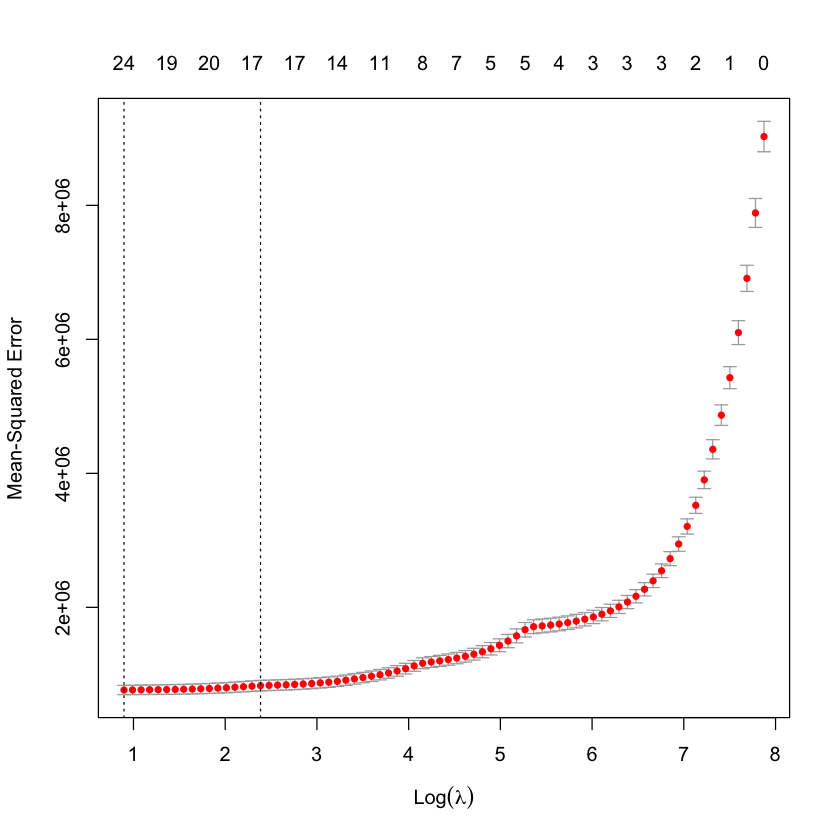

For  3 th hour  
 
 


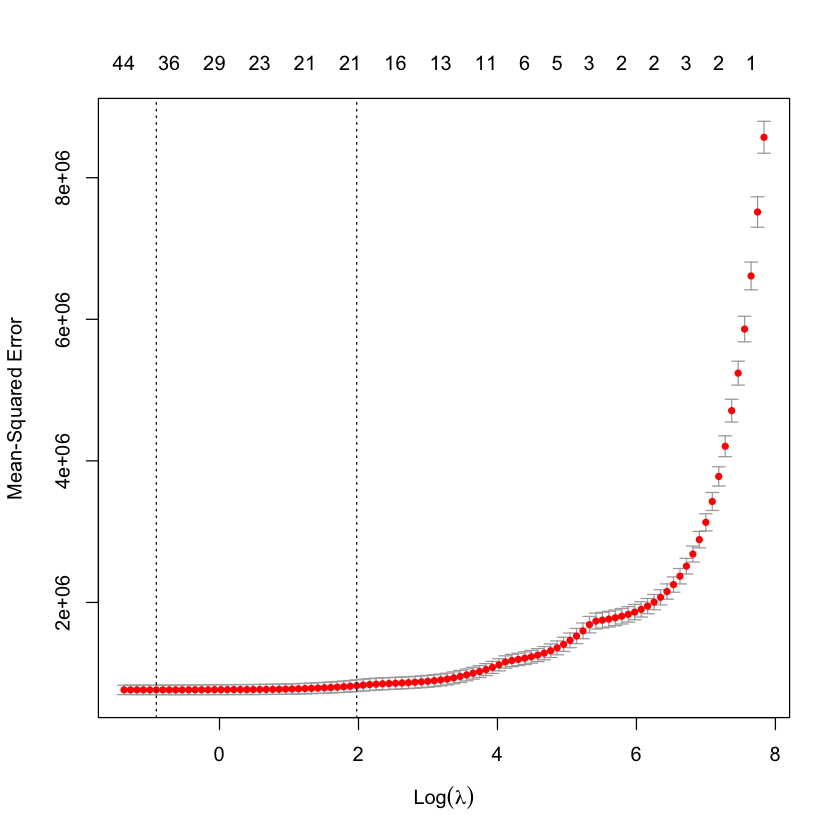

For  4 th hour  
 
 


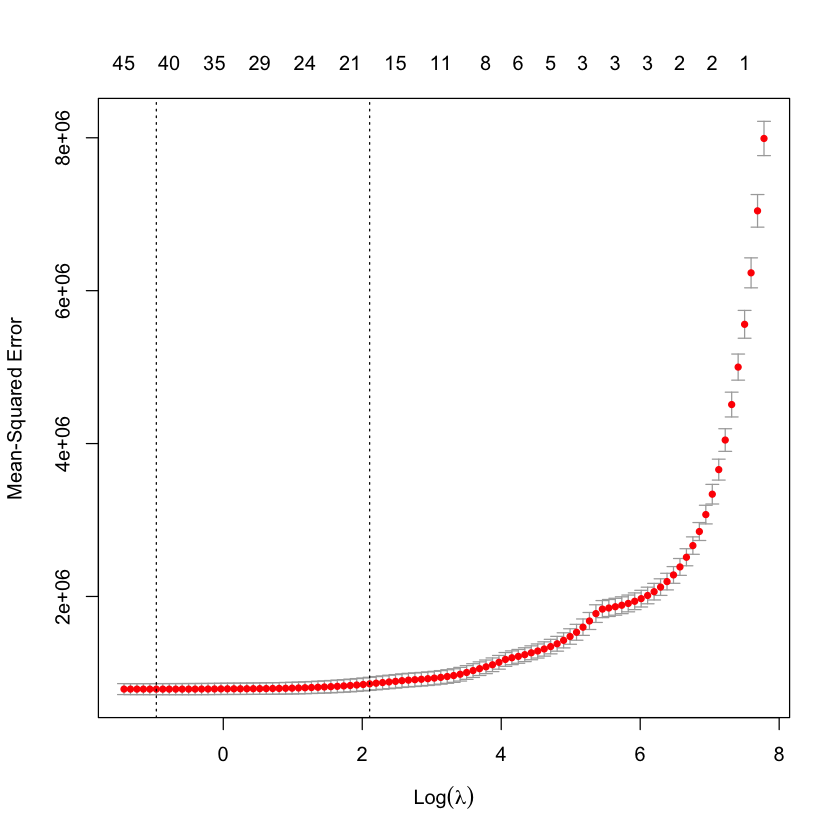

For  5 th hour  
 
 


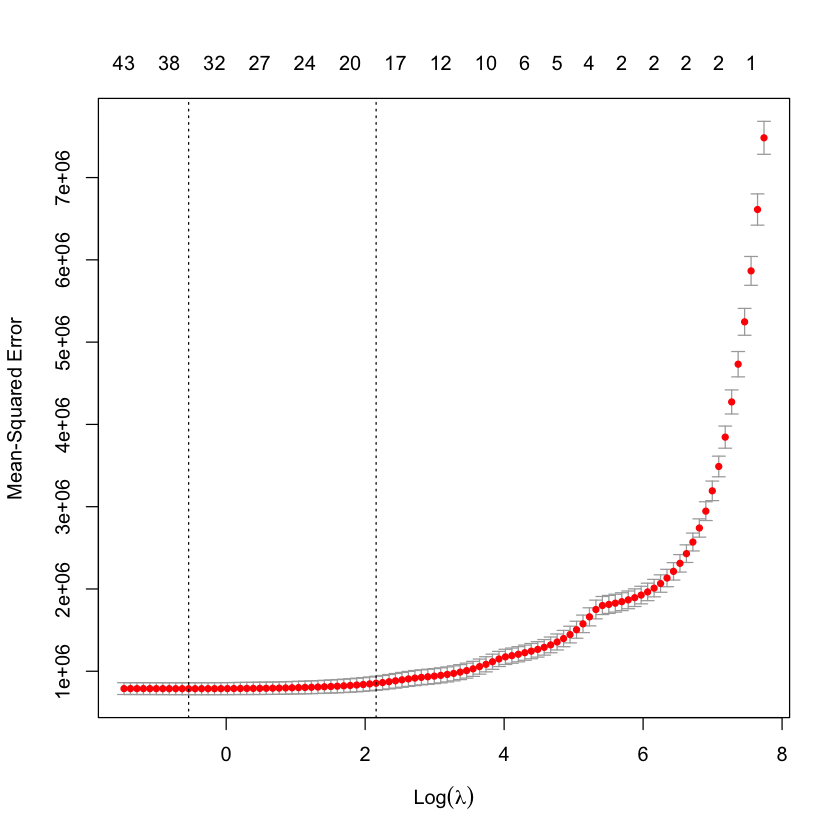

For  6 th hour  
 
 


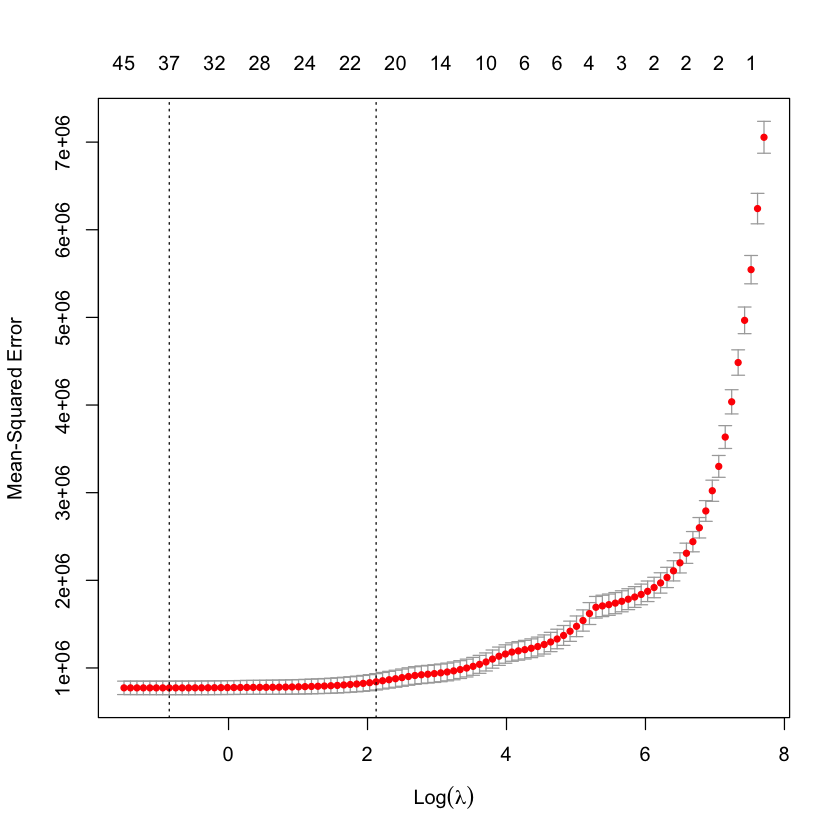

For  7 th hour  
 
 


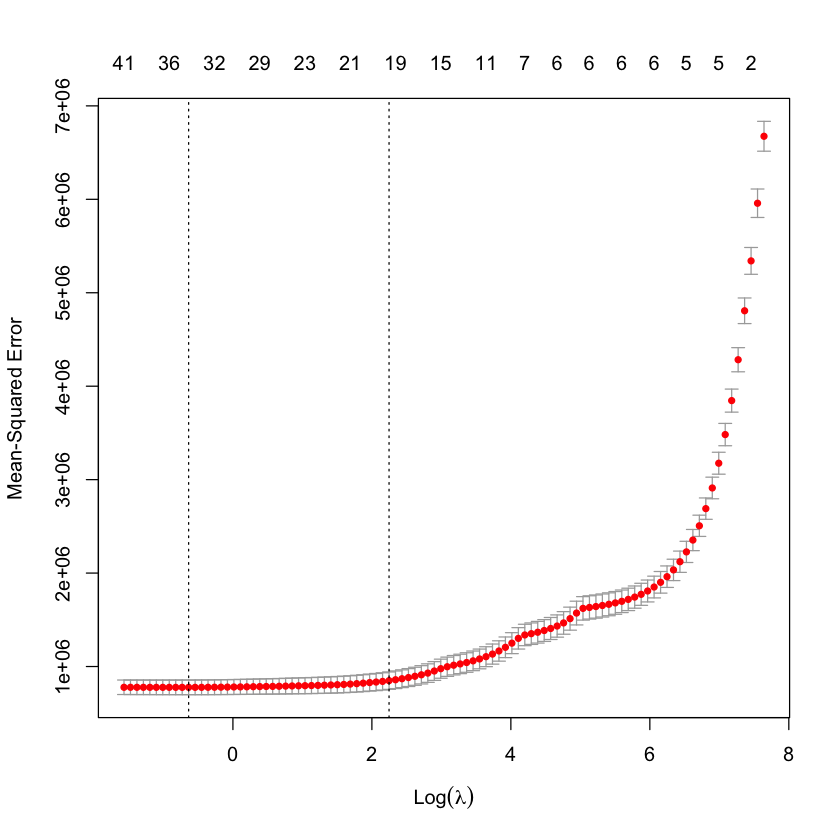

For  8 th hour  
 
 


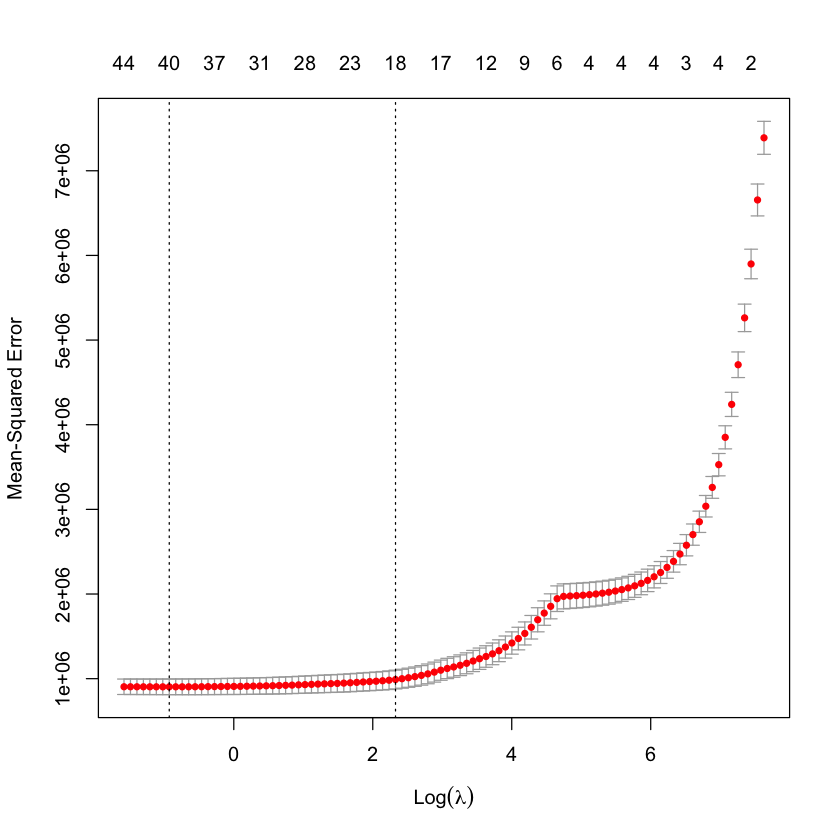

For  9 th hour  
 
 


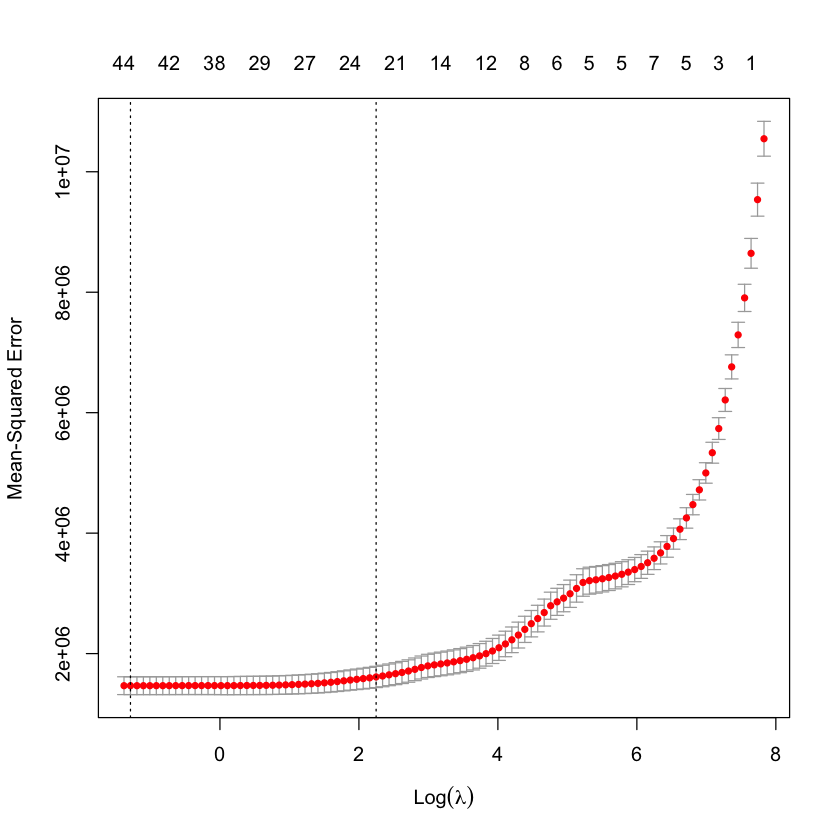

For  10 th hour  
 
 


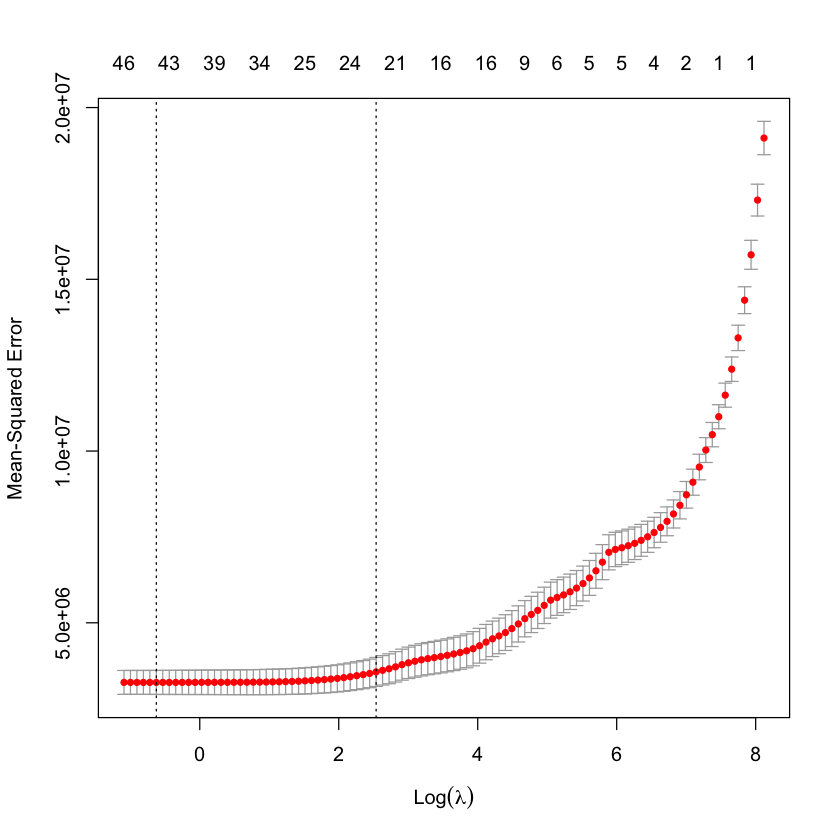

For  11 th hour  
 
 


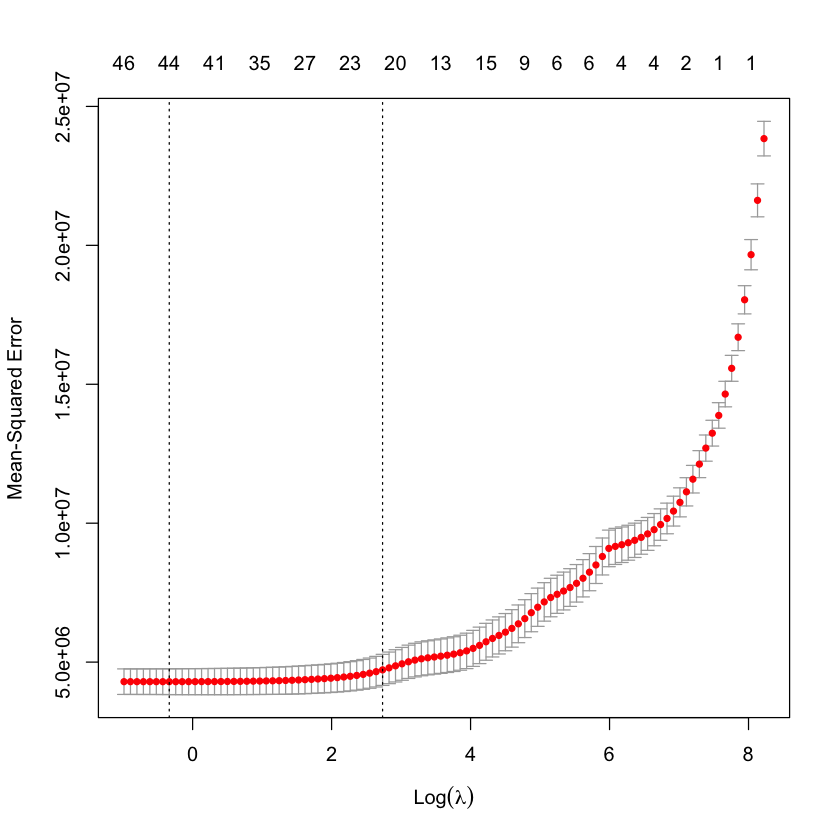

For  12 th hour  
 
 


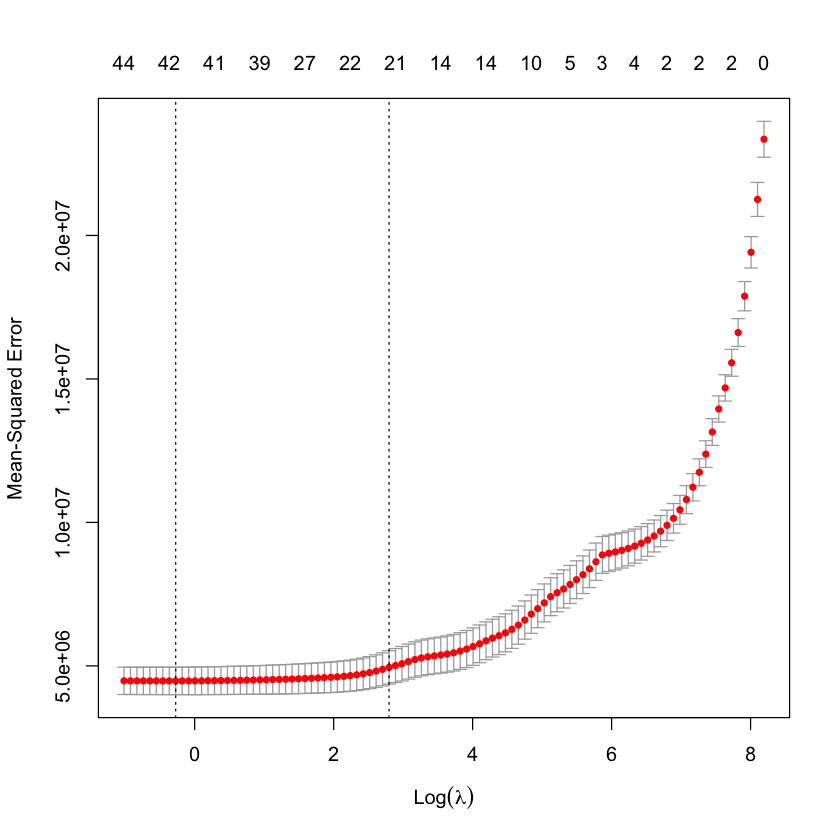

For  13 th hour  
 
 


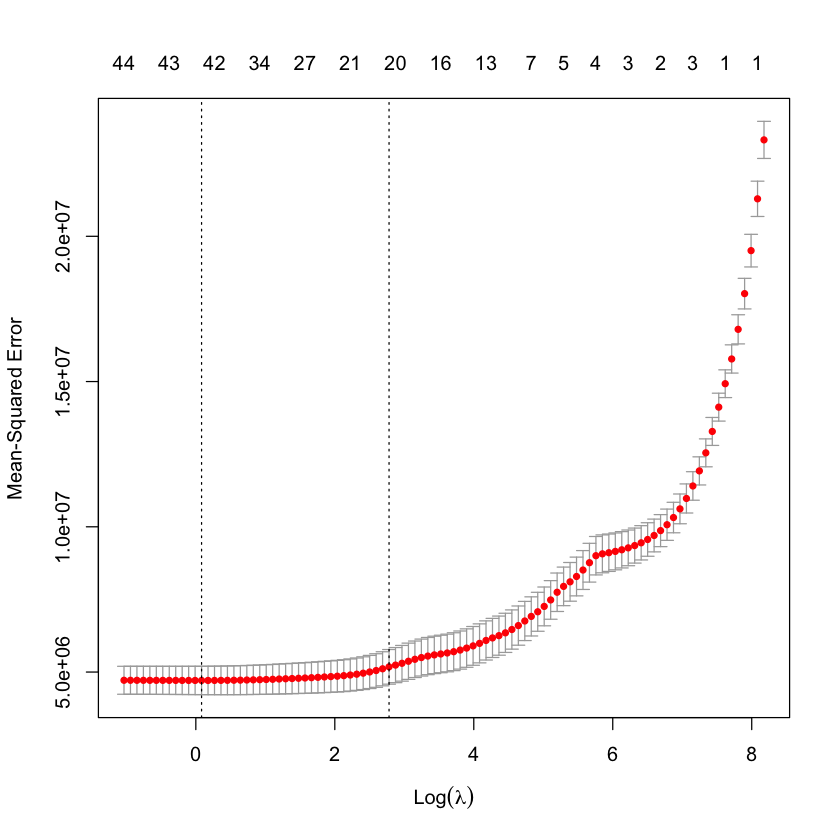

For  14 th hour  
 
 


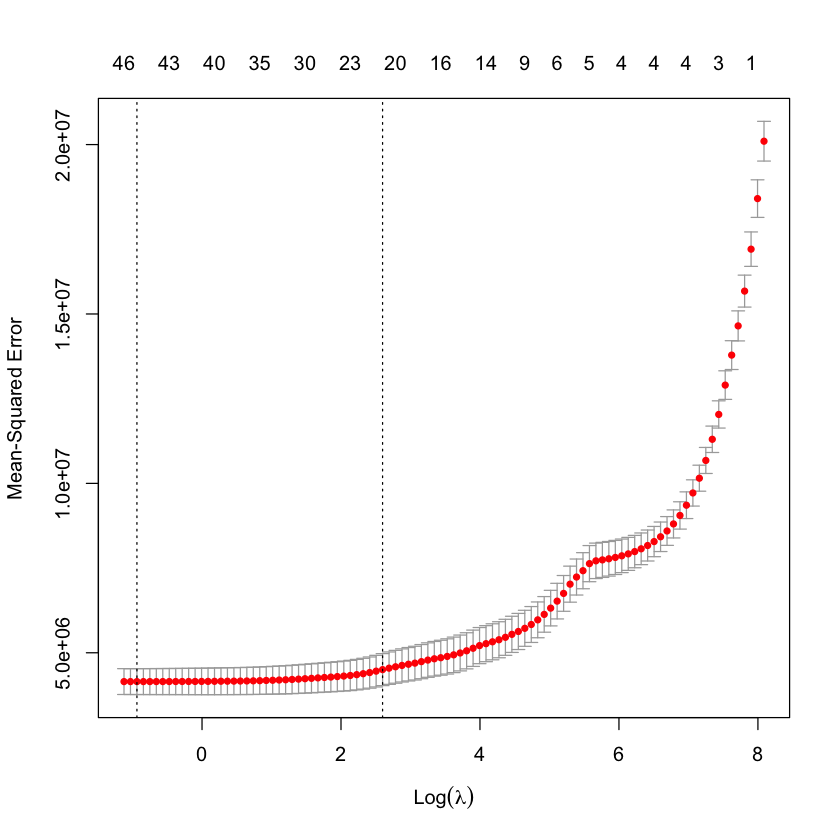

For  15 th hour  
 
 


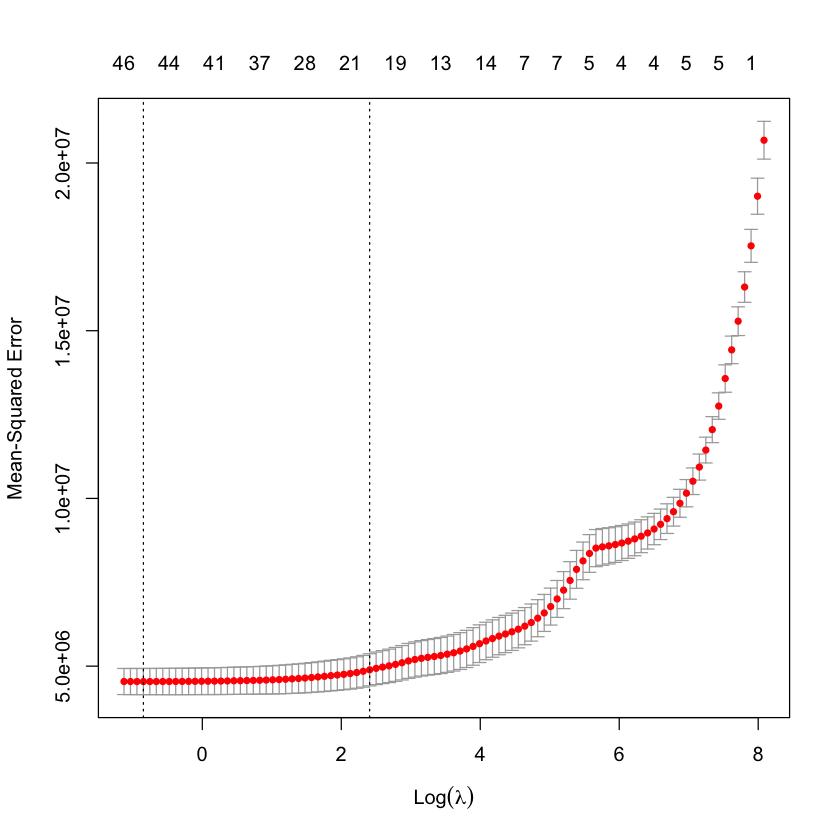

For  16 th hour  
 
 


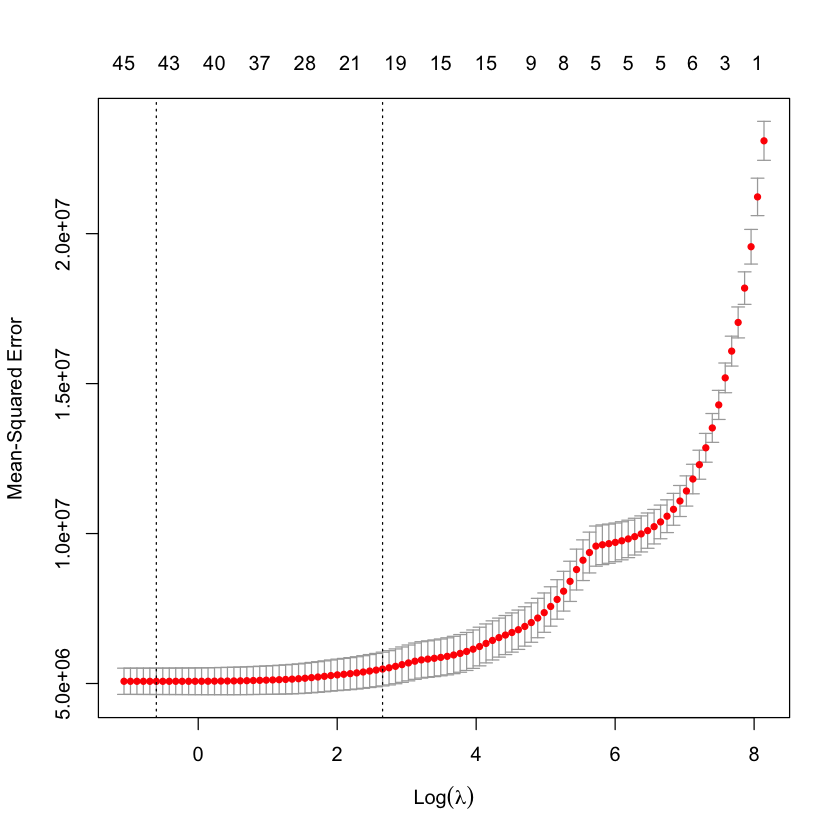

For  17 th hour  
 
 


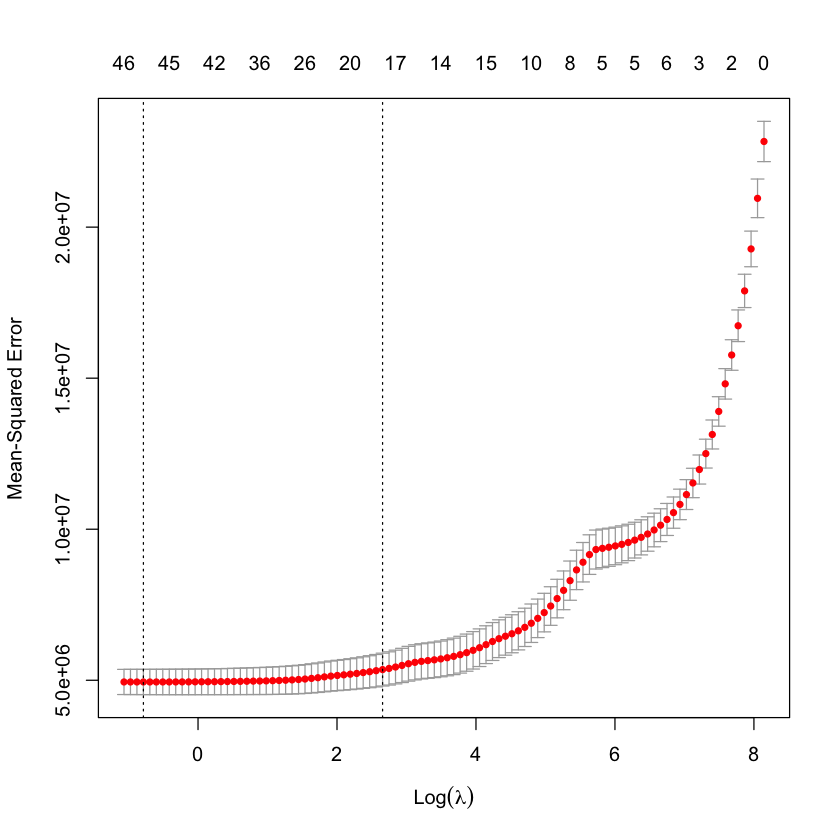

For  18 th hour  
 
 


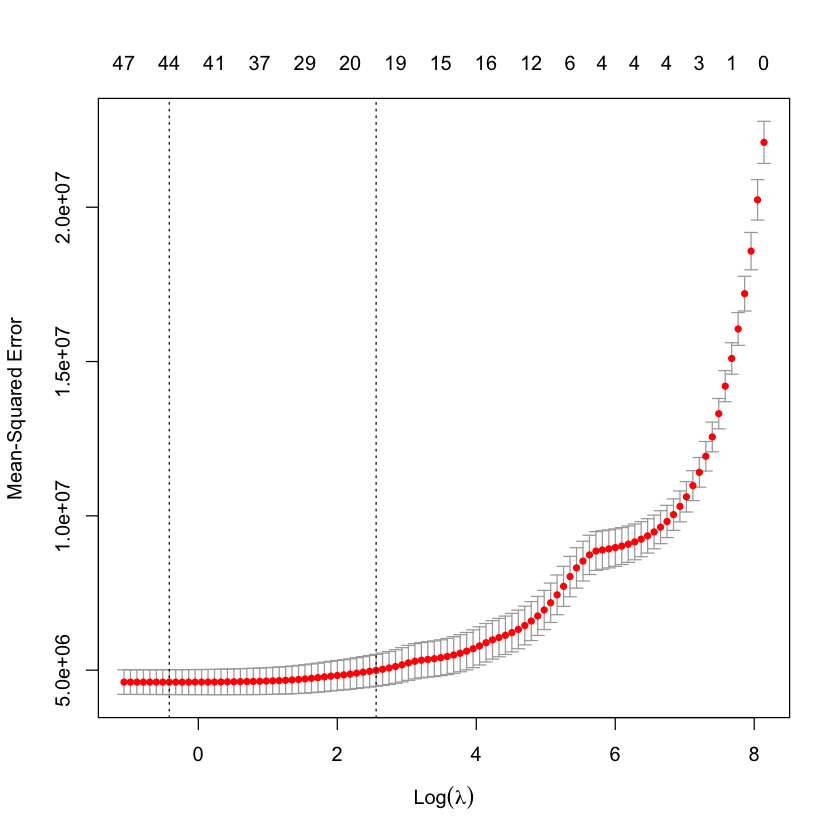

For  19 th hour  
 
 


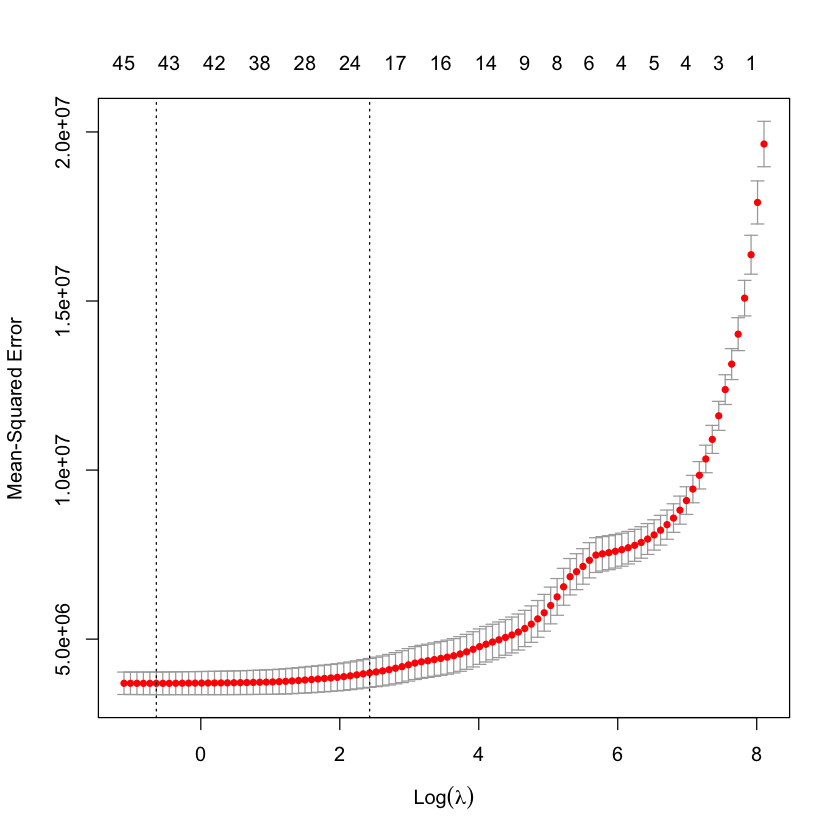

For  20 th hour  
 
 


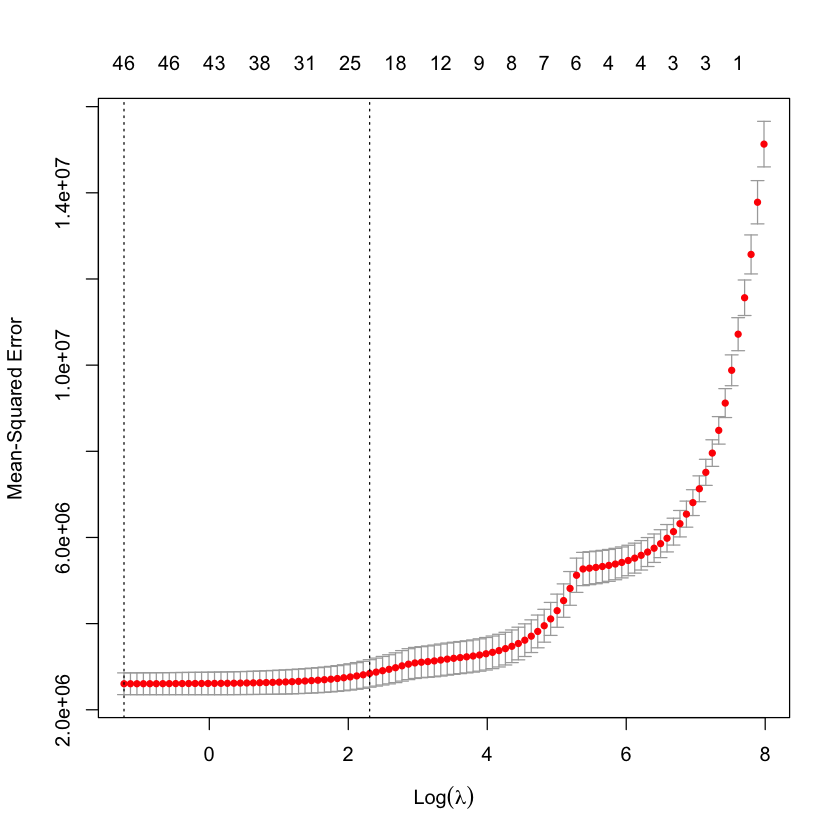

For  21 th hour  
 
 


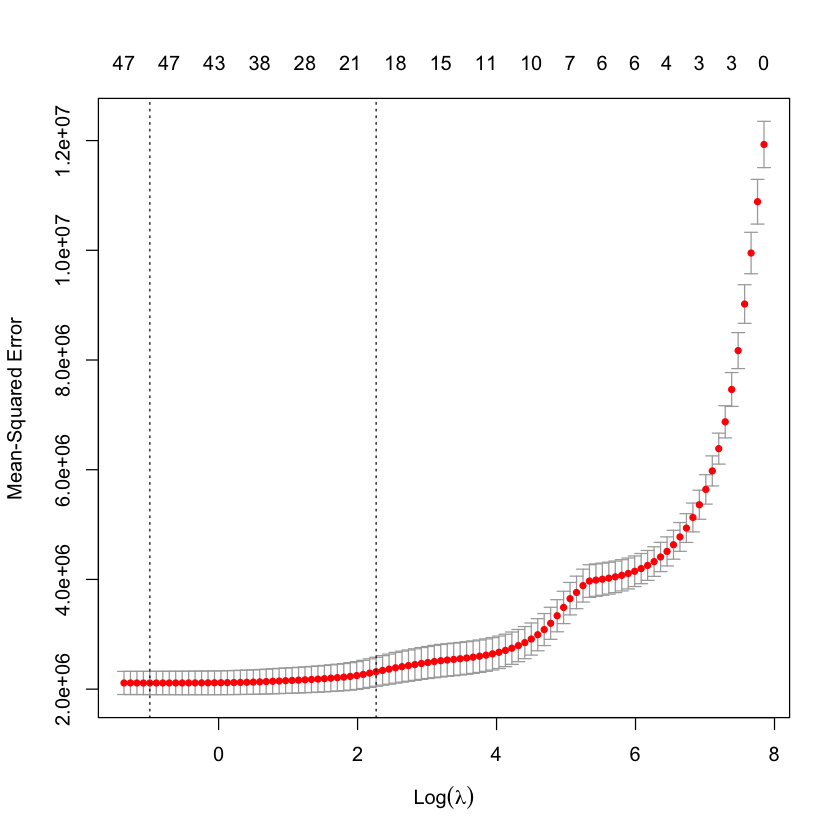

For  22 th hour  
 
 


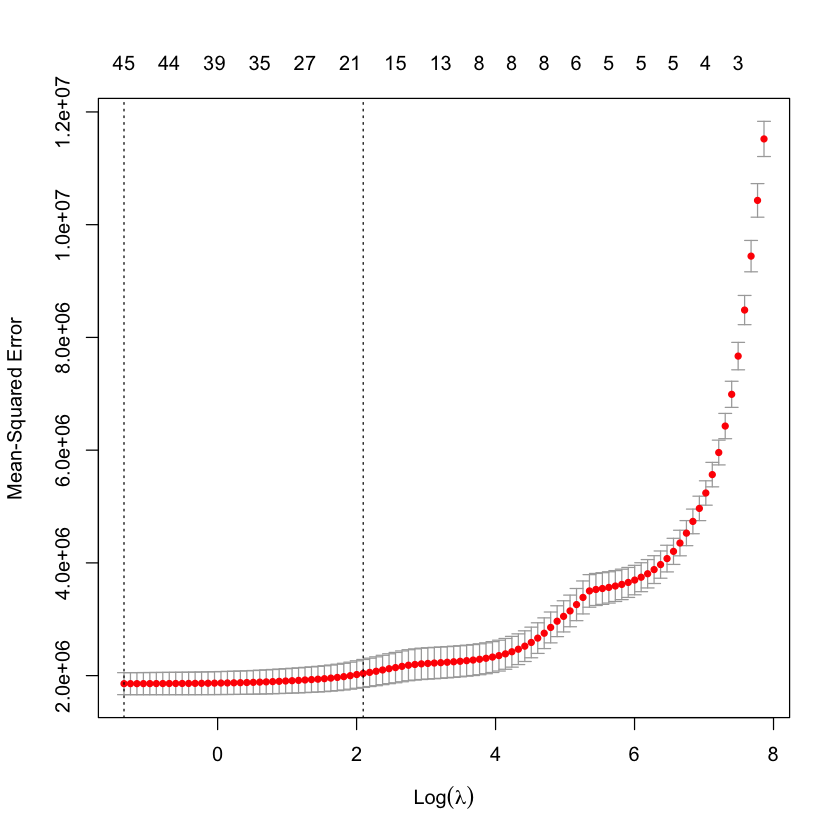

For  23 th hour  
 
 


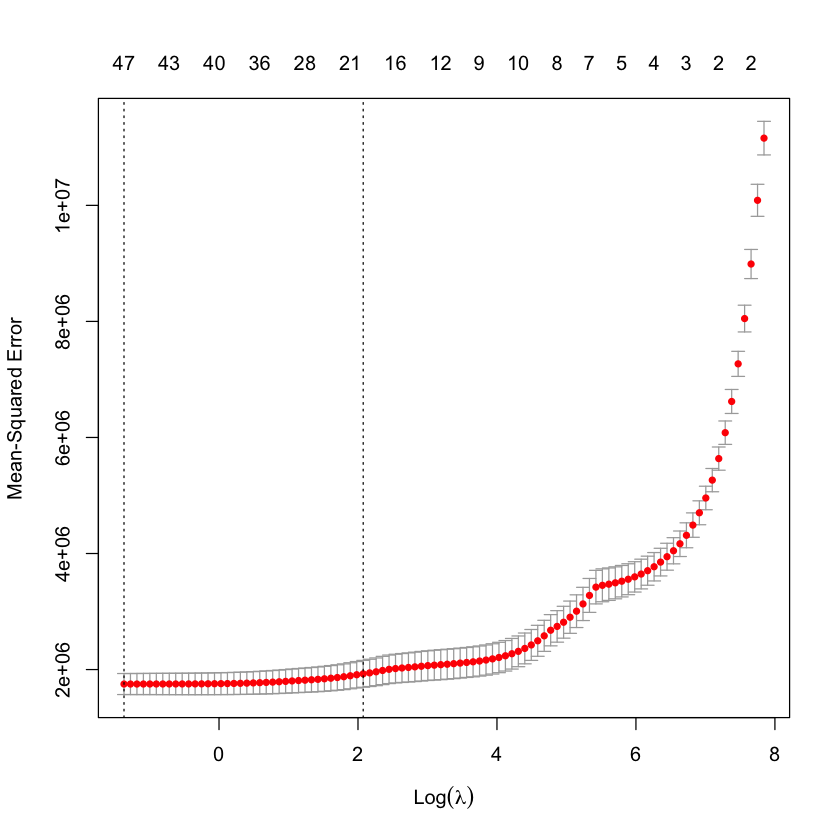

For  24 th hour  
 
 


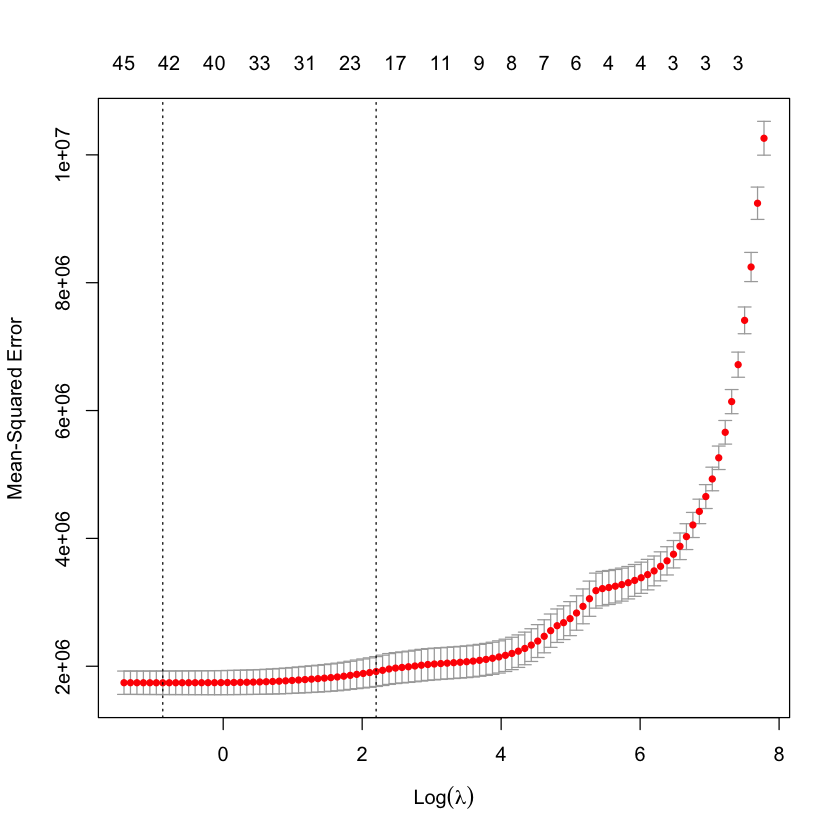

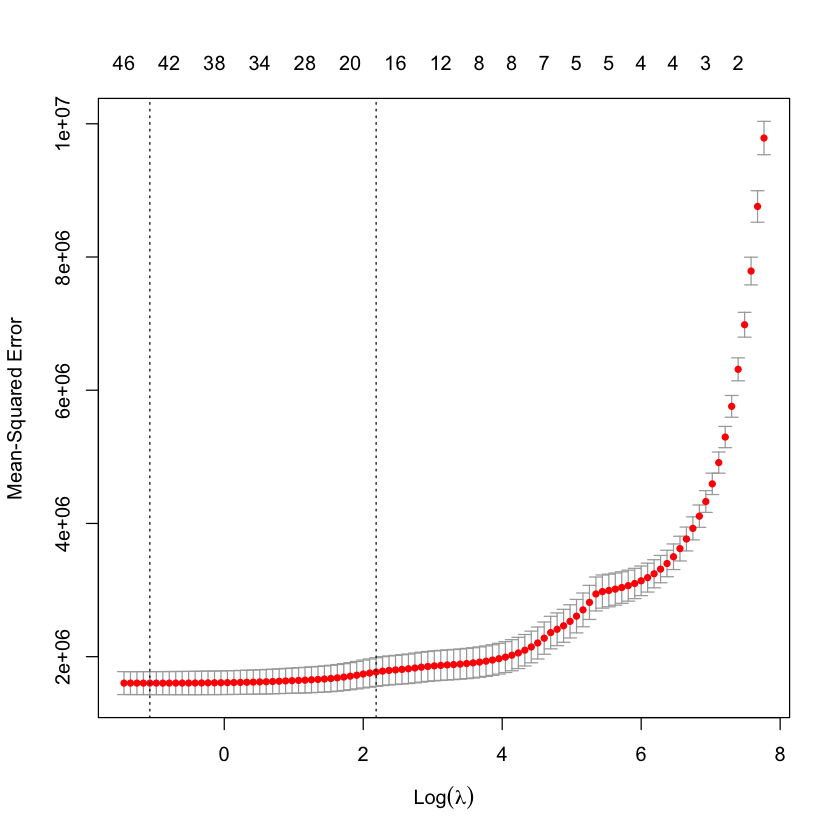

In [60]:

cvfit <- c()
prediction_withlasso <- c()
prediction_Lasso <- matrix(0,31,24)
error <- matrix(0,31,24)
mape_lasso <- c()
lalo<-c()
coefs<-c()

for (i in 2:25){
    
  set.seed(2019702030)
    
  #noisy<-as.matrix(train_wide[,..selected])
   y = as.matrix(train_cons[,..i])
    
    y_test = as.matrix(test_cons[,..i])
    
  cvfit<-cv.glmnet(x=noisy,y=y,nlambda = 100,family="gaussian", type.measure="mse")
    
    cat("For ", (i-1), "th hour ", "\n","\n","\n")
    if(i==2){
    coefs<- coefficients(cvfit)
    }
    coefs<-cbind(coefs,coefficients(cvfit))
    plot(cvfit)
    
    par
    
    lambda_s = cvfit$lambda.1se
    #cat("Best Lambda (Lambda.1se) ", lambda_s ,"\n")
lalo[i-1]<-lambda_s 
    
    best_lasso = glmnet(noisy , y  , alpha =1, lambda = lambda_s)
    
    prediction_withlasso = predict(best_lasso,  s=lambda_s, newx = test_wide)
    

    for (j in 1:nrow(test_wide)){
        
        prediction_Lasso[j,i-1] = prediction_withlasso[j,1]
        
        error[j,i-1] = abs((y_test[j]-prediction_Lasso[j,i-1])/y_test[j])*100
    }
    
    mape_lasso[i-1] = mean(error[,i-1])
  }





For all hours, Log(lambda) versus MSE plots are show the similar patterns. Toward lower lambda value, both MSE and varience have tendency to decrease. Hence, Lambda.1se can be used to prevent from more complexity. When we used that lambda 17-21 features are enough.


Hourly Lambda.1se values are tabulated below

In [61]:
data.frame(test[1:24,2],lalo)

test.1.24..2.,lalo
<fct>,<dbl>
0,10.861679
1,7.203547
2,8.220103
3,8.652209
4,8.362429
5,9.458659
6,10.251244
7,9.464783
8,12.653409


In [62]:
cat("MAPE Lasso hourly=", mean(mape_lasso) ,"\n")

mape_lasso<-data.frame(mape_lasso)
summary(mape_lasso)
data.frame(test[1:24,2],mape_lasso)

MAPE Lasso hourly= 2.487165 


   mape_lasso   
 Min.   :1.400  
 1st Qu.:1.522  
 Median :1.729  
 Mean   :2.487  
 3rd Qu.:3.739  
 Max.   :4.763  

test.1.24..2.,mape_lasso
<fct>,<dbl>
0,1.485554
1,1.534672
2,1.568943
3,1.399598
4,1.434331
5,1.431160
6,1.653554
7,1.805068
8,2.543626


Also coefficients are given below.

In [63]:
coefs

   [[ suppressing 25 column names ‘1’, ‘1’, ‘1’ ... ]]



49 x 25 sparse Matrix of class "dgCMatrix"
                                                                       
(Intercept)     636.189327288 636.189327288 954.245091025  1.318693e+03
Lag_day2_hour0   -0.004528024  -0.004528024  -0.152512006 -3.276973e-01
Lag_day2_hour1   -0.077911298  -0.077911298   .            .           
Lag_day2_hour2    .             .             .            .           
Lag_day2_hour3    .             .             .            1.382849e-01
Lag_day2_hour4    .             .             0.060931079  1.608919e-01
Lag_day2_hour5    .             .             .            .           
Lag_day2_hour6    .             .             .            .           
Lag_day2_hour7    0.003912297   0.003912297   0.069003393  .           
Lag_day2_hour8    .             .             .            .           
Lag_day2_hour9   -0.455214187  -0.455214187  -0.434745539 -4.055530e-01
Lag_day2_hour10   .             .            -0.032493753 -4.379657e-02
Lag_day2_hour11   .  

In [64]:
data.frame(test_cons[,1],prediction_Lasso)


Date,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-11-01,28690.31,27228.98,26266.76,25507.69,25089.56,25047.42,25060.50,24516.28,24812.20,⋯,27860.04,28085.67,28991.43,30810.76,32539.01,32738.05,31991.63,31104.67,30345.63,29084.69
2020-11-02,27841.32,26339.10,25601.49,25086.11,24894.33,25162.40,25778.10,26930.15,30265.98,⋯,32449.70,32993.08,34162.26,35718.39,36411.85,35806.99,34880.64,33914.52,32811.94,31323.31
2020-11-03,30225.96,28894.46,27928.31,27310.82,27053.18,27236.28,27873.35,28719.90,31910.58,⋯,34335.78,34584.68,35434.59,36624.43,37228.68,36715.18,35763.37,34649.05,33690.55,32168.18
2020-11-04,31785.61,30343.58,29320.65,28627.34,28399.62,28532.46,29119.43,30119.42,33760.12,⋯,35943.51,36187.34,37155.91,38433.59,38673.16,37764.03,36756.45,35741.40,34722.84,33125.80
2020-11-05,30979.97,29625.05,28532.02,27791.00,27497.34,27535.46,27976.49,28406.75,30941.16,⋯,34113.60,34330.52,35184.48,36568.45,37406.77,36731.69,35694.41,34614.34,33682.48,32154.97
2020-11-06,30978.58,29526.45,28523.62,27858.26,27615.98,27878.80,28597.50,29833.03,34044.04,⋯,36842.50,36964.73,37741.32,38806.20,38792.17,37828.03,36896.02,35690.94,34727.58,33164.98
2020-11-07,31367.72,29898.09,28843.80,28106.60,27757.56,27876.50,28224.46,28776.81,32035.16,⋯,35019.15,34964.63,35466.87,36508.97,37302.19,36941.38,36099.54,34844.19,33888.79,32306.06
2020-11-08,30878.05,29274.44,28081.16,27236.53,26801.13,26745.97,26862.16,26580.10,27442.01,⋯,30714.35,30968.00,31837.14,33512.54,35087.93,35031.09,34426.10,33566.68,32731.28,31393.89
2020-11-09,30209.11,28762.67,27765.19,27185.61,26956.21,27160.63,28254.51,29807.32,34105.21,⋯,36813.59,37050.70,38094.84,39504.19,39829.26,38792.52,37747.23,36701.11,35565.03,34014.06


# BONUS D

In [67]:
library(penalized)
library("Rmpfr")
library(CVXR)

In [76]:
#ls(train_wide)
#train_wide

In [69]:
train_cons<-as.matrix(train_cons)
#train_cons
noisy<-as.matrix(noisy)
#as.matrix(noisy[,2])
#train_cons

In [70]:
lambda_1 = lambda_s
lambda_2 = lambda_s
#beta <- Variable(48)
model_fused_hourly = data.table()

for (i in 2:25){
    
     y = as.matrix(train_cons[,i])
    
   # y_test = as.matrix(test_cons[,..i])
    
  # y_train <- noisy[,i-1]
  #  y_train <- data.frame(y_train)
   # x_train <- train_cons[,..i]
    #x_train <- data.frame(x_train)
    
     m <- ncol(noisy)
    beta <- Variable(m)
    #n<-length(beta)
    
    obj <- sum((y- noisy%*%beta)^2) + lambda_2*(sum(beta)^2) + lambda_1*sum(p_norm(diff(beta,lag=1,differences=1)))
    #lambda_1*sum(pos(beta[(1+lag):n] - beta[1:(n-lag)]))
    #lambda_1*sum(pos(diff(beta,lag=1,k=1)))
  
    prob <- Problem(Minimize(obj))
    a<-solve(prob)
    a$getValue(beta)
    }

ERROR: Error: $ operator is invalid for atomic vectors


loss function is written as 'obj'.

In [71]:
a

[1] 42385

# TASK F

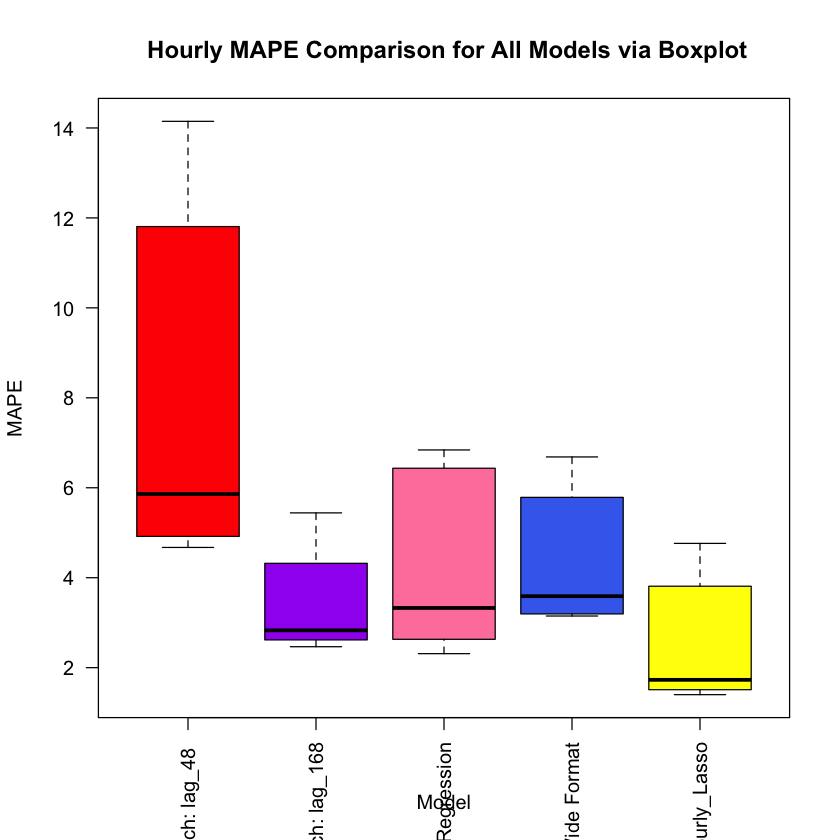

In [72]:

every_MAPE_in_the_world <- cbind(mape48_task_a_hourly, mape168_task_a_hourly, mape, mape_hourly, mape_lasso)
every_MAPE_in_the_world <- data.frame(every_MAPE_in_the_world)
 
colnames(every_MAPE_in_the_world)[1] = "Naive_Approach_lag_48"
colnames(every_MAPE_in_the_world)[2] = "Naive_Approach_lag_168"
colnames(every_MAPE_in_the_world)[3] = "Linear_Regression"
colnames(every_MAPE_in_the_world)[4] = "Linear_Regression_Hourly_Wide_Format"
colnames(every_MAPE_in_the_world)[5] = "Lasso_Hourly"

boxplot(every_MAPE_in_the_world, xlab="Model", ylab="MAPE", main=" Hourly MAPE Comparison for All Models via Boxplot",las=2, names=c('Naïve Approach: lag_48 ', 'Naïve approach: lag_168', 'Linear Regression', 'Linear Regression Hourly Wide Format', 'Hourly_Lasso'),col = c('red','purple','palevioletred1','royalblue2','yellow'))
#every_MAPE_in_the_world <- every_MAPE_in_the_world[,c('Naïve Approach: lag_168 ', 'Naïve approach: lag_48', 'Linear Regression', 'Linear Regression Hourly Wide Format', 'Hourly_Lasso')]

#mape168, mape48, mape, mape_hourly, mape_lasso

 First boxplot is derived from task A with Lag48, second one from task A with Lag168,
third one from task B linear regression model, forth one is obtain from wide format 
task C, last one is created for task D.

* Red one has both high variance and high bias which is worst prediction.
* Yellow one has lowest bias.
* Purple one has lowest varience.
* Pink and blue ones are nearly equal biased but pink one has hisher varience.
* Also is can be said that most effective one is the yellow one in total which is modelled with Lasso Penalty.


In [75]:
data.frame(test[1:24,2],every_MAPE_in_the_world)

test.1.24..2.,Naive_Approach_lag_48,Naive_Approach_lag_168,Linear_Regression,Linear_Regression_Hourly_Wide_Format,Lasso_Hourly
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,4.676979,2.773019,2.655474,3.263676,1.485554
1,4.921247,2.591936,2.589461,3.283923,1.534672
2,5.055477,2.644995,2.605809,3.419484,1.568943
3,4.673006,2.562837,2.318646,3.203031,1.399598
4,4.751160,2.576864,2.311193,3.182973,1.434331
5,4.915776,2.613395,2.374448,3.187622,1.431160
6,5.356758,2.702048,2.522770,3.148336,1.653554
7,7.056625,3.276225,3.441626,3.777416,1.805068
8,12.179013,3.257286,5.519401,4.675844,2.543626
